In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline

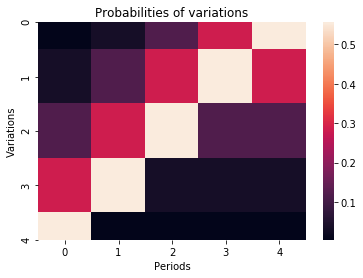

In [2]:


# количество вариаций
n_variations = 5

# сколько раз меняются предпочтения
n_switches = 5

# каждые n_period_len показов кнопки предпочтения пользователей меняются
n_period_len = 2000

# истинные вероятности клика по каждой вариации
# напомню, что длина периода, в течение которого тренд не меняется, равна n_period_len
p_true_periods = np.array([
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 1],
        [3, 4, 5, 2, 1],
        [4, 5, 3, 2, 1],
        [5, 4, 3, 2, 1]], dtype=np.float32).T**3
p_true_periods /= p_true_periods.sum(axis=0)

# отрисуем истинные вероятности
ax = sns.heatmap(p_true_periods)
ax.set(xlabel='Periods', ylabel='Variations', title='Probabilities of variations')
plt.show()

In [3]:
p_true_periods

array([[0.00444444, 0.03555556, 0.12      , 0.28444445, 0.5555556 ],
       [0.03555556, 0.12      , 0.28444445, 0.5555556 , 0.28444445],
       [0.12      , 0.28444445, 0.5555556 , 0.12      , 0.12      ],
       [0.28444445, 0.5555556 , 0.03555556, 0.03555556, 0.03555556],
       [0.5555556 , 0.00444444, 0.00444444, 0.00444444, 0.00444444]],
      dtype=float32)

Winner is 4
4    1921
3      53
0      10
2       8
1       8
dtype: int64


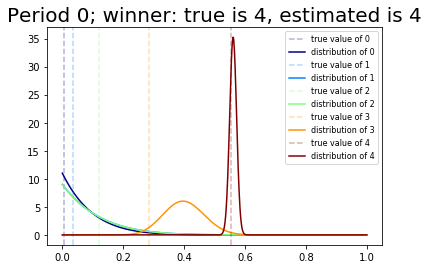

Winner is 3
3    1594
4     398
1       4
0       3
2       1
dtype: int64


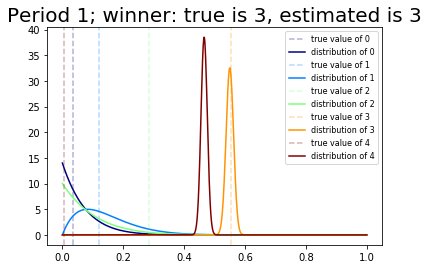

Winner is 2
2    1062
3     606
4     327
1       5
dtype: int64


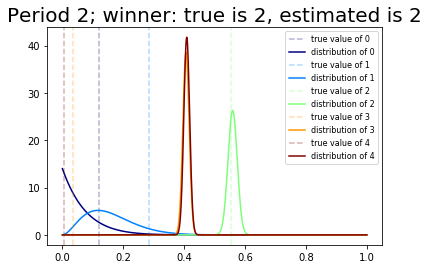

Winner is 1
1    816
2    794
4    211
3    178
0      1
dtype: int64


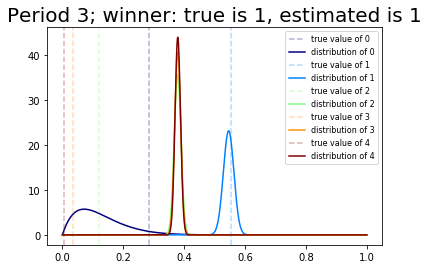

Winner is 0
1    1150
0     621
3      79
2      78
4      72
dtype: int64


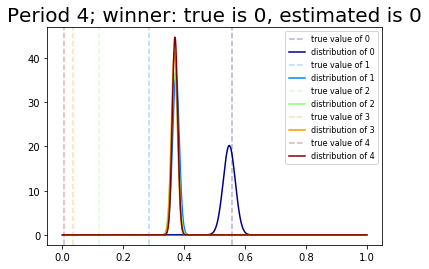

In [10]:
x_support = np.linspace(0, 1, 1000)

alpha = dict([(i, [1]) for i in range(n_variations)])
beta = dict([(i, [1]) for i in range(n_variations)])

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, n_variations)]

actionspp = []

for ix_period in range(p_true_periods.shape[1]):
    p_true = p_true_periods[:, ix_period]
    is_converged = False
    actions = []
    for ix_step in range(n_period_len):
        theta = dict([(i, np.random.beta(alpha[i][-1], beta[i][-1])) 
                      for i in range(n_variations)])
        k, theta_k = sorted(theta.items(), key=lambda t: t[1], reverse=True)[0]
        actions.append(k)

        x_k = np.random.binomial(1, p_true[k], size=1)[0]

        alpha[k].append(alpha[k][-1] + x_k)
        beta[k].append(beta[k][-1] + 1 - x_k)

    expected_reward = dict([(i, alpha[i][-1]/float(alpha[i][-1] + beta[i][-1])) 
                            for i in range(n_variations)])
    estimated_winner = sorted(expected_reward.items(), 
                              key=lambda t: t[1], 
                              reverse=True)[0][0]

    print('Winner is %i' % estimated_winner)
    actions_loc = pd.Series(actions).value_counts()
    print(actions_loc)
    actionspp.append(actions_loc.to_dict())

    for i in range(n_variations):
        plt.axvline(x=p_true[i], color=colors[i], linestyle='--', 
                    alpha=0.3, label='true value of %i' % i)

        plt.plot(x_support, stats.beta.pdf(x_support, alpha[i][-1], beta[i][-1]), 
                 label='distribution of %i' % i, color=colors[i])
    plt.legend(prop={'size': 8})
    plt.title('Period %i; winner: true is %i, estimated is %i' % 
              (ix_period, 
               p_true.argmax(),
               estimated_winner),
              fontsize=20)
    plt.show()

actionspp = dict(enumerate(actionspp))

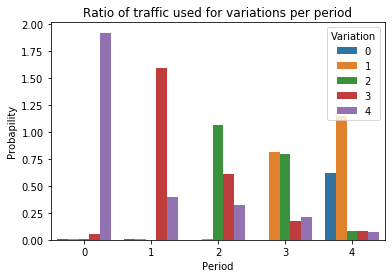

In [11]:
df = []
for pid in actionspp.keys():
    for vid in actionspp[pid].keys():
        df.append({
                'Period': pid,
                'Variation': vid,
                'Probapility': actionspp[pid][vid]/1000.0
            })
df = pd.DataFrame(df)
ax = sns.barplot(x="Period", y="Probapility", hue="Variation", data=df)
ax.set(title="Ratio of traffic used for variations per period")
plt.show()

In [12]:
p_true_periods

array([[0.00444444, 0.03555556, 0.12      , 0.28444445, 0.5555556 ],
       [0.03555556, 0.12      , 0.28444445, 0.5555556 , 0.28444445],
       [0.12      , 0.28444445, 0.5555556 , 0.12      , 0.12      ],
       [0.28444445, 0.5555556 , 0.03555556, 0.03555556, 0.03555556],
       [0.5555556 , 0.00444444, 0.00444444, 0.00444444, 0.00444444]],
      dtype=float32)